# 복습 잠깐

In [1]:
from PIL import Image

In [5]:
im = Image.open('C:/Users/white/OneDrive/사진/카메라 앨범/꼬마돌.png')
im.mode # 모드는 이런거다.

'RGBA'

In [3]:
dir(im) # array_interface라는게 있다.
im.__array_interface__

{'shape': (217, 194, 4),
 'typestr': '|u1',
 'version': 3,
 'data': b'p\x81\x7f\xffs\x85\x82\xfft\x86\x82\xffy\x88\x86\xff}\x8c\x87\xff\x93\x9d\x87\xff\xb2\xb2\x89\xff\xbc\xb8\x81\xff\xc0\xb9\x7f\xff\xc1\xba\x82\xff\xc3\xb8\x83\xff\xbe\xb5\x80\xff\xb7\xb1y\xff\xb2\xaeu\xff\xab\xa7n\xff\xa8\xa4l\xff\xa9\xa4l\xff\xab\xa3n\xff\xae\xa4o\xff\xac\xa1m\xff\xac\xa1m\xff\xa9\xa1j\xff\xa8\xa0i\xff\xac\xa3g\xff\xb4\xabp\xff\xbd\xb2x\xff\xbe\xb2v\xff\xbe\xb2|\xff\xbf\xb7\x97\xff\xc1\xbc\xb5\xff\xc0\xbb\xc0\xff\xbf\xb7\xbb\xff\xa2\x91\x92\xff^LH\xff.(%\xff"#"\xff  !\xff  #\xff"##\xff%)+\xffLU^\xffku\x88\xffm{\x8a\xffiy\x89\xffn{\x86\xffcmp\xffW__\xffcmk\xffXb[\xffT[Q\xff`aT\xffuqf\xff|xs\xff}{w\xffzus\xffric\xffykk\xff]NS\xff1*&\xff%$ \xff#$!\xff\',\'\xffS^U\xff\xa4\xac\xaa\xff\xc1\xc3\xc6\xff\xc7\xc8\xc9\xff\xc6\xc8\xc8\xff\xc4\xc7\xc7\xff\xc5\xc7\xc7\xff\xc7\xc8\xc7\xff\xc6\xc4\xc5\xff\xbd\xbe\xbe\xff\xc1\xc3\xc2\xff\xc6\xc8\xc7\xff\xc4\xc8\xc7\xff\xc5\xc7\xc6\xff\xc6\xc6\xc6\xff\xc2\xc0\xc1\xff\

 - 엔디언에 상관없이 저장한다: |
 - b라는건 비트라는 것이다.
 - 외부환경 때문에 에러날 것을 대비해서 try ~ except까지 해주면 좋다. + with
 - save를 이용해서 파일 포맷을 바꿀 수 있다.
 - 케라스 기본적인 이미지 처리가 PIL기반이라서, 이런 것을 하는 거다.

# crop

In [6]:
box = (100, 100, 400, 400) # 왼, 위, 오른, 아래
region = im.crop(box)

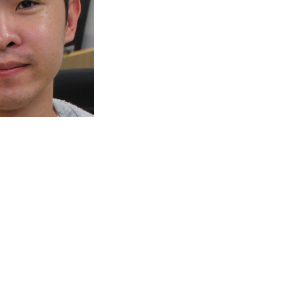

In [7]:
region

맨 위부터 (왼, 위), (오른, 아래) 좌표를 잡고 짜르면 된다. (0, 0)이 위, 왼쪽인 것이다.

# Paste & Rolling

잘라낸 부분 붙이기

### array_programming을 이용한 방법

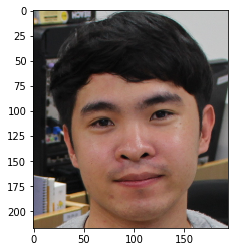

In [9]:
import numpy as np
import matplotlib.pyplot as plt
im = Image.open('C:/Users/white/OneDrive/사진/카메라 앨범/꼬마돌.png')
im_numpy = np.array(im)
plt.imshow(im_numpy)

In [14]:
t = np.zeros_like(im_numpy)
t.shape # 똑같은 shape 하나 만들어주기

(217, 194, 4)

In [23]:
# plt.imshow(im_numpy[:, 40:, :])
t[:, :154, :], t[:, 154:, :] = im_numpy[:, 40:, :], im_numpy[:, :40, :]

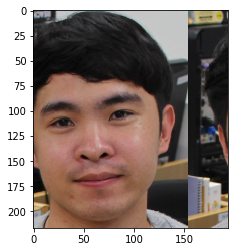

In [24]:
plt.imshow(t)

### numpy를 이용하는 방법

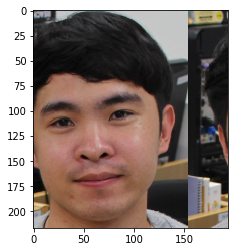

In [10]:
back = im_numpy[:,0:40,...]
front = im_numpy[:, 40:, ...]
new = np.hstack([front, back])
plt.imshow(new)

 - 자꾸 좌표개념으로 접근을 하는데... 좌표는 shape의 index와 관련이 있고
 - 실제 숫자들은 색상과 관련이 있는 것이다.
 
R값만 슬라이싱

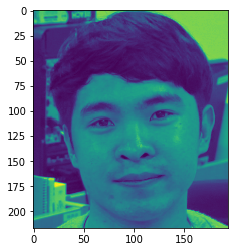

In [11]:
im = Image.open('C:/Users/white/OneDrive/사진/카메라 앨범/꼬마돌.png')
im_numpy = np.array(im)
r, g, b, a = im.split()
plt.imshow(g)

In [12]:
np.array(r)

array([[112, 115, 116, ..., 196, 196, 196],
       [107, 103, 108, ..., 196, 197, 195],
       [108, 101, 106, ..., 196, 196, 195],
       ...,
       [120, 119, 119, ..., 173, 126,  95],
       [119, 117, 118, ..., 191, 193, 197],
       [118, 117, 118, ..., 190, 189, 188]], dtype=uint8)

In [25]:
im_numpy[:, :, 0].shape

(217, 194)

In [14]:
np.all(im_numpy[:,:,0] == np.array(r))

True

# 케라스로 연습하기

1. 제일 먼저 채널값부터 체크한다. 그런데 채널값은 없어도 된다.

In [10]:
from tensorflow.keras.datasets import mnist

In [11]:
(x,_), _ = mnist.load_data()

In [12]:
np.all(x[0] == x[0,:,:]) # 동일한 기법이다.

True

In [13]:
x.dtype # u가 붙으면 양수만 있다는 뜻. 8이므로 256가지가 있다는 뜻이다.

dtype('uint8')

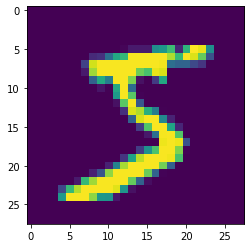

In [14]:
plt.imshow(x[0])

### 3차원으로 만들기

In [15]:
import numpy as np

In [19]:
t = x[0].reshape(28, 28, 1)
# plt.imshow(t) # 채널이 적어서 안 된다.
s = x[0][:,:, np.newaxis] # 이렇게 newaxis로 할 수 있다.

In [17]:
s.shape

(28, 28, 1)

In [34]:
new = np.stack([s, s, s], axis = 2)
new = np.squeeze(new, axis = 3)
new.shape

(28, 28, 3)

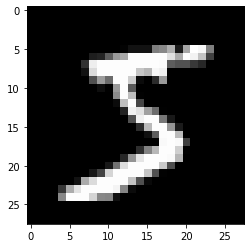

In [35]:
plt.imshow(new)

이번엔 x 자체를 바꿔보자.

imshow가 보여주는 애는 2차원 또는 3차원 애를 보여준다.

In [36]:
xx = x.reshape(60000, 28, 28, 1)
# plt.imshow(xx) # 차원이 1차원이므로 안 된다.

# 3개 RGB로 합치기

평균내서 하면 된다.

In [72]:
im = Image.open('C:/Users/white/OneDrive/사진/카메라 앨범/꼬마돌.png')
r, g, b, a = im.split()
im_numpy = np.array(im)

In [73]:
# new = ( im_numpy[:,:,0] + im_numpy[:,:,1] + im_numpy[:,:,2] + im_numpy[:,:,3]) / 4
np.average(im_numpy, axis = 2).shape

(217, 194)

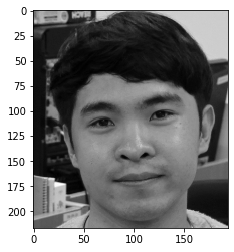

In [74]:
plt.imshow(np.average(im_numpy, axis = 2),
           cmap = 'gray')

### Image.merge 이용하기

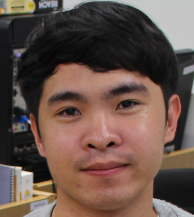

In [75]:
im = Image.merge("RGBA", (r, g, b, a)) # 이렇게 붙여서 할 수도 있다.
im

In [43]:
#!pip install opencv-python

In [21]:
import cv2 # opencv 이다.
from PIL import Image

In [22]:
imcv = cv2.imread('C:/aaa.png') # BGR이 디폴트로 불러들인다.

In [23]:
imcv.shape
b, g, r = Image.fromarray(imcv[...,0]), Image.fromarray(imcv[...,1]), Image.fromarray(imcv[...,2])
new_img = Image.merge("RGB", (r, g, b))

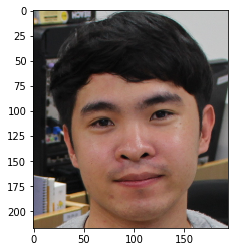

In [24]:
plt.imshow(new_img)

# cifar10

In [86]:
from tensorflow.keras.datasets import cifar10

In [87]:
(x, y), (i, j) = cifar10.load_data() # 구조 알기 전까지는 len으로 파악하는게 좋다.

In [88]:
x.shape # 채널라스트 방식이구나.

(50000, 32, 32, 3)

### 채널파악하기

★★★★ 다 그려봐야 한다. 이거 채널 한번에 파악할 수는 없다.

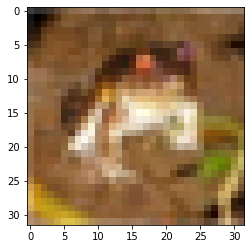

In [89]:
plt.imshow(x[0])

In [69]:
a = [[[1,], [2,3]]]
a[0][0][0] # 파이썬에서는 이렇게 뽑아야 한다.

1

In [78]:
print(x[0].shape)
print(x[0][1:3].shape)

(32, 32, 3)
(2, 32, 3)


In [81]:
# 넘파이는 펜시인덱싱을 지원하기 때문에
x[:, :, :, 0].shape

(50000, 32, 32)

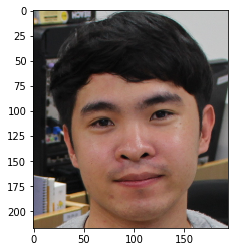

In [95]:
im = cv2.imread('C:/aaa.png')
a, b, c = cv2.split(im)
t = cv2.merge((c, b, a), im)
plt.imshow(t) # 이런식으로 cv2를 이용할 수 있다.

# 넘파이를 PIL로 바꿔보기

In [94]:
type(t)

numpy.ndarray

In [127]:
from PIL import Image

y = Image.fromarray(t)
type(y)

PIL.Image.Image

 - opencv는 비디오 처리가 너무 막강하다. 비디오 처리 하려면, opencv이다.
 - opencv는 한글 지원이 안된다...

In [97]:
import PIL

In [98]:
dir(y) # filter라는 애가 있다.
y.filter # shift tab 치면 PIL의 이미지 필터를 쓰라고 되어있다.

<bound method Image.filter of <PIL.Image.Image image mode=RGB size=194x217 at 0x18E1FF91908>>

In [90]:
from PIL import ImageFilter
# dir(ImageFilter)

In [99]:
type(ImageFilter.BLUR) # 클래스이다.

type

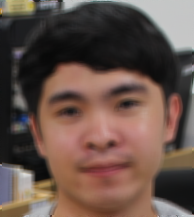

In [100]:
y.filter(ImageFilter.BLUR) # 흐려진다.
# y.filter(ImageFilter.UnsharpMask) # 클래스가 인자로 들어간다. 그런데 메타클래스 개념때문에, 이것도 가능한 것이다.

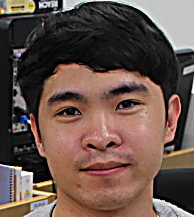

In [101]:
x = ImageFilter.UnsharpMask() # 이렇게 인스턴스화 해도 된다.
y.filter(x)

이런식으로 메타클래스를 알고 집어넣으면, 초고수라고 할 수 있다.

In [102]:
from PIL import ImageDraw

In [109]:
dir(ImageDraw.ImageDraw) # __class__가 있으니까 클래스가 맞다.
i = ImageDraw.ImageDraw(y) # __init__할때 남의 것 들고와서 하는 것. 그러니까 컴포지션 기법이다.

In [110]:
i.rectangle([(20,20), (40, 40)]) # SHIFT TAB쳐보니 알아서 파일 열어서 보라고 한다.

In [126]:
import inspect
print(inspect.getsource(i.rectangle))

    def rectangle(self, xy, fill=None, outline=None, width=0):
        """Draw a rectangle."""
        ink, fill = self._getink(outline, fill)
        if fill is not None:
            self.draw.draw_rectangle(xy, fill, 1)
        if ink is not None and ink != fill:
            self.draw.draw_rectangle(xy, ink, 0, width)



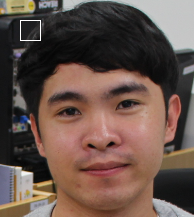

In [111]:
y

컴포지션 방식으로 다 한 것이다.

### text

In [116]:
from PIL import ImageFont

In [176]:
y = Image.fromarray(t)
i = ImageDraw.ImageDraw(y)
# dir(ImageFont.truetype)
f = ImageFont.truetype(font = 'malgunbd.ttf', encoding='utf-8')

In [177]:
# dir(i.text())

In [178]:
i.text((0, 100), '원섭섭', font = f, fill = (255, 255, 255))

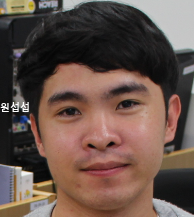

In [179]:
y